# Bungee Drop Lab
## PH 211 COCC
### Bruce Emerson 3/2/2020

This notebook is meant to provide tools and discussion to support data analysis and presentation as you generate your lab reports. 

[Bungee II Lab](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabbungeeII.html) and [Bungee II Lab Discussion](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabDbungeeII.html)

In this lab we are examine a calibration curve, verifiy it's values, fit a curve to the data and integrate that function. From there we can use energy methods to determine the mass that can be dropped from the railing without damaging the floor.

For the formal lab report you will want to create your own description of what you understand the process and intended outcome of the lab is. Please don't just copy the purpose statement from the lab page.

### The Setting

In the 'IRL' version of this lab you are presented with a '2 m' calibrated bungee cord that is shared by the class. The class is shown the railing in the lobby of the Science Building to which a clamp will be afixed holding a rigid bar. The bungee cord will be attached to the bar, weights will be put in the bag at the end of the bungee (replicating a human being), and the bag will be dropped from a point level with the railing. Your task, as the student, is to determine how much mass can be placed in the bag such that the bag will stop just as it reaches the ground (meaning a couple of cm above the floor since we don't want to damage the bag or the floor). 

This replicates the adjustments that actual bungee jump operations accomplish by changing the length of a static rope (that doesn't stretch much) attached between the bungee cord and the frame of the jumping platform.

### How far does Bungee stretch?

In the future when we return to the lab in real life the following numbers will be manipulated to compell students to replace them with their own measurements.

Here is the underlying (currently real - 3/2021) data:

1. The unstretched length of the bungee is 2.45 m between the knots (Lo)
1. The length of the clips and the bag combined is .33 m (BC)
1. The knotted parts of the bungee are 1 cm long each (Kn)
1. The height of the railing is 6.02 m above the floor

Can you figure out, on your own, bow much the bungee cord must be stretched when the bag just reaches the floor?

The ultimate stretch $\Delta x$ of the bungee when it gets to the floor is given by...

.$$\large \Delta x = H - ( L_0 + BC + Kn) $$



In [18]:
drop_height = 6.02 # H in m
relaxed_length = 2.45 # L0 from above in m
bag_clips = 0.33 # BC above in m
knots = 0.02 #Kn above in m

desired_stretch = drop_height - (relaxed_length + bag_clips + knots)

print("The maximum stretch of the bungee will be %.3f m " % (desired_stretch))

The maximum stretch of the bungee will be 3.220 m 


### Energy Bar Graph:

Now that we have a python notebook that we can use to generate an energy bar graph it seems reasonable to use it here. 

[Energy Bar Graph notebook](https://github.com/smithrockmaker/PH211/blob/master/EnergyBarGraph.ipynb)

This notbook has active element (interactive widgets) that will not work unless you download the notebook and run it in your Jupyterlab window.  When you do so you might generate a energy bar chart that looks like this.

<img src="images/bungeeBar" width="600" height="600" />

## Dependencies

This is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  
  
```numpy``` is a numerical tools library - often imported as np. ```numpy``` also contains the statistical tools that we will use in this lab. There are other libraries dedicated to statistical tools but 'numpy' has everything we need.  
```matplotlib```is a 'MATLAB like' library. 
```matplotlib.pyplot``` is often imported as ```plt``` to make it easier to use. ```matplotlib``` has the plotting tools that we need for this lab. 

The new library from ```numpy``` is needed for creating a polynomial fit to the data later on. There are multiple version of these modules for different purposes. This one feels best matched to our needs and experience.

[numpy.polynomial.polynomial module](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.polynomial.html)

The following code cell will need to be run first before any other code cells.

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply
from scipy.integrate import quad

## Data Entry (Lists/Vectors) 

I am providing a set of data points that represent the characterization curve for a 2 m bungee cord. In principle we should be able to use the normalized data from the Bungee Characterization Lab but typically our results are inconsistent enough that actual data is a better idea. I generated this data by stretching the bungee out on the floor and using a scale to measure the force. Because that's a little challenging with one person I'd like you to check that data. This is generally a good practice for all experimental tests.

In [2]:
forcedata = [0., 4.90, 9.81, 14.72, 19.62, 24.53, 29.43,34.34,39.24, 44.15]
stretchdata = [0., 0.20, .47, .72, 1.11, 1.51, 2.10, 2.69, 3.22, 3.82]

# useful constants

gravity = 9.815 # in m/s/s
drop_height = 6.02 # in m

# 2 ways to print out and check your data

print("force data:",forcedata)
print("stretch data:",stretchdata)

forcedatalength = len(forcedata)
stretchdatalength = len(stretchdata)
# length counts how many 'data points' in the list
print("number of data points (x):", forcedatalength)
print("number of data points (y):", stretchdatalength)

force data: [0.0, 4.9, 9.81, 14.72, 19.62, 24.53, 29.43, 34.34, 39.24, 44.15]
stretch data: [0.0, 0.2, 0.47, 0.72, 1.11, 1.51, 2.1, 2.69, 3.22, 3.82]
number of data points (x): 10
number of data points (y): 10


### Data Plot

If you are unsure what is happening here refer to earlier labs where it has been described in more detail. 



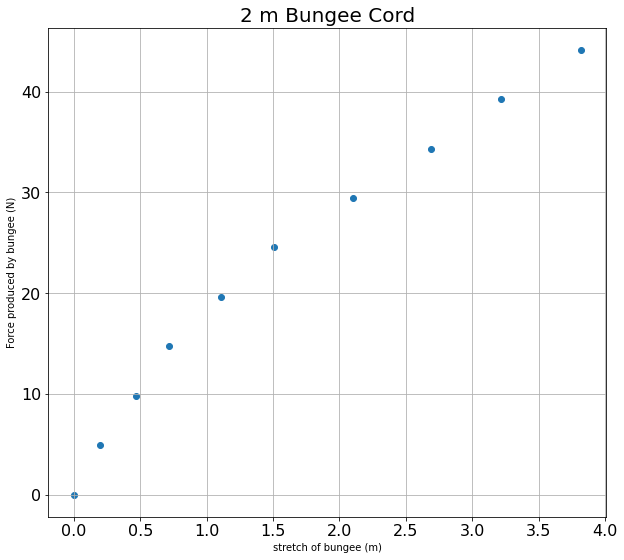

In [5]:
fig1, ax1 = plt.subplots()
ax1.scatter(stretchdata, forcedata)


# a way to set labels
plt.xlabel('stretch of bungee (m)', fontsize = 10)
plt.ylabel('Force produced by bungee (N)', fontsize = 10)
plt.title('2 m Bungee Cord', fontsize = 20)

ax1.grid()
fig1.set_size_inches(10, 9)
#fig.savefig("myplot.png")
plt.show()

### Curve Fitting

Now that we know how to curve fit lets use that skill to find the function that matches the data. I include the reminders from our previous lab.

```degree``` is the order of the polynomial as in degree = 2 => quadratic polynomial with 3 coefficients.

[polynomial.polynomial.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyfit.html)

Here's an interesting thing to notice about this data...it looks much like a parabola laid on it's side. When we do a polynomial fit to the data we're using functions like $x$ , $x^2$, and $x^3$ etc. All of the functions curl upwards and don't match our function well. However, if we reverse the x and y axes in our data it looks much more reasonable to do a polynomial fit. To help visualize this I plotted our data in this way below.

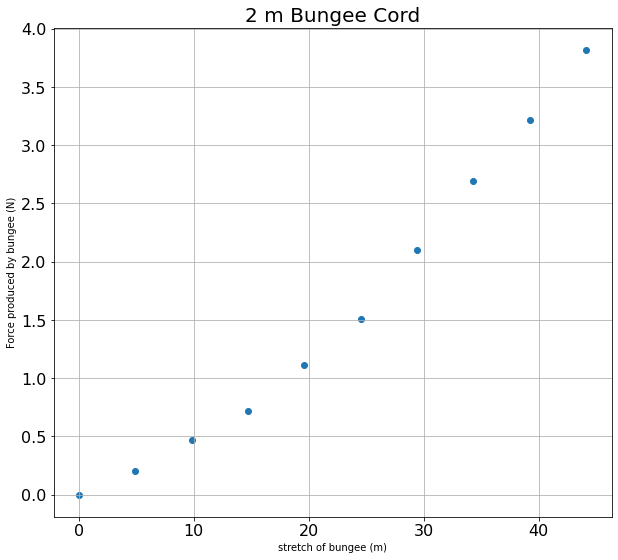

In [6]:

fig2, ax2 = plt.subplots()
ax2.scatter(forcedata, stretchdata)

# a way to set labels
plt.xlabel('stretch of bungee (m)', fontsize = 10)
plt.ylabel('Force produced by bungee (N)', fontsize = 10)
plt.title('2 m Bungee Cord', fontsize = 20)

ax2.grid()
fig2.set_size_inches(10, 9)
#fig.savefig("myplot.png")
plt.show()

In [10]:
# be sure that the order of the polynomial fit matches the model calculation
# in the next code cell.
degree = 2
coefs = ply.polyfit(forcedata, stretchdata,degree)
print("Coefficients of polynomial fit:", coefs)

Coefficients of polynomial fit: [-0.0084568   0.03467479  0.00120597]


### Add the physics model...the curve fit and the bungee

In this case all we want to do is plot the model against the data and be sure that it feels like a good fit. The terms for cubic and quartic polynomials are in the expression but commented out. It is worth your time to explore what order polynomial gives you the most reasonable fit. You can adjust that in the cell above and below in the appropriate places.

**A Coding Note**

The calculation of the model values can get pretty long as a mathematical formula. What is illustrated below is one method to 'fold' or 'wrap' the code line so that it is easier to read and understand. To make this method work I put the entire calculation inside a set of parentheses so that the python elves keep looking for the other end of the parentheses and find it on a later line.


In [11]:
# generate x values for model of data
maxforce = 45.
numpoints = 20
modelforce = np.linspace(0.,maxforce,numpoints)

# create a model height list that matches the model time
modelstretch = np.full_like(modelforce,0)


# calculate the heights predicted from the model
# uncomment the appropriate terms if using 
# higher order polynomials!! Check location of closing
# parentheses!!
modelstretch = (coefs[0] + coefs[1]*modelforce
                    + coefs[2]*modelforce**2) 
                    #+ coefs[3]*modelforce**3) 
                    #+ coefs[4]*modelforce**4)

# print("testing the output of the loop;", modelheight)

### Plot Data with Model 

Just like we've done previously with different labels. Once I have my model data poitns it doesn't matter which way I plot them so I did so that the model and the data are consistent with out bungee characterization lab.

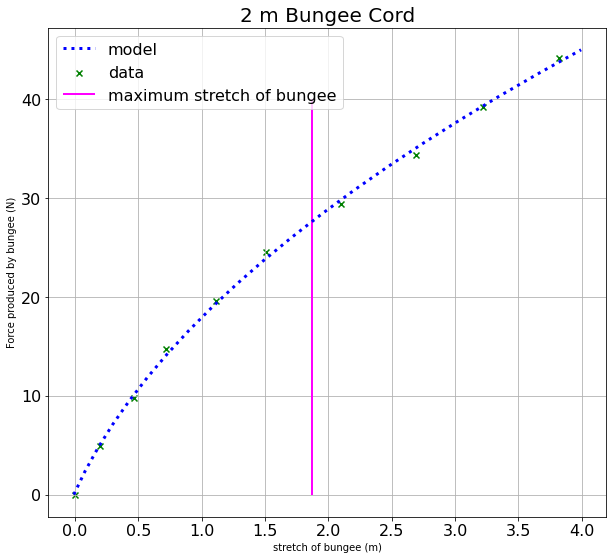

In [13]:
fig3, ax3 = plt.subplots()
ax3.scatter(stretchdata, forcedata,
            marker = 'x', color = 'green',
            label = "data")
ax3.plot(modelstretch, modelforce,
         color = 'blue', linestyle = ':',
         linewidth = 3., label = "model")


maxbungee_stretch = 1.87
ax3.vlines(maxbungee_stretch, 0, 40,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "maximum stretch of bungee")

# a way to set labels
plt.xlabel('stretch of bungee (m)', fontsize = 10)
plt.ylabel('Force produced by bungee (N)', fontsize = 10)
plt.title('2 m Bungee Cord', fontsize = 20)

fig3.set_size_inches(10, 9)
ax3.grid()

plt.legend(loc= 2)
plt.show()

### Integration (New Skill!)

Not surprisingly there are numerical integration tools built into python and in particular into the scientific computing library called scipy. The tool we will use is called quad and is one of a range of integration tools available. I am completely unable to describe what all the different tools do at this point (its on my reading list now) but quad is apparently a standard choice. I give you both references below.

[scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)

[scipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)

I took and reworked the example given on these pages for our purposes.

### Commentary on code

The code below follows the structure of the ```scipy.integrate.quad example``` cited above. Conceptually I defined a python function that gives me back the 'y' value when I feed it the degree of the polynomial and the coefficients from my previous fit. Functions are another very useful feature of all coding environments and I don't propose to go into any depth here. Suffice it to say that if I 'call' the function and give it the information it wants it will give me back the y value associated with a given x value. It is important to remember that in this case I have reversed the independent and dependent variables so what I actually have is a function that describes the stretch as a function of the force!

```
def polyint(x, coefs, degree):
    dependent_var = 0
    for i in range (0,degree+1):
        dependent_var = dependent_var + coefs[i] * x**i
    return dependent_var


definite_integral = quad(polyint, 0., 45, args = (coefs, degree))

print("The definite integral is %.3f with estimated error %.6f:" % (definite_integral))
```

The cell below finds the area below the stretch vrs force curve in the normal sense of the integral. Take a look at the 'reversed' plot up above to see that the values make sense. If you picture the area under the curve from 0 to 10 N you would expect it to be a bit less than 1.5 -- think about triangles -- and that is what the integration below delivers.

In [16]:
# define a function which is the integrand of our integral
# In this case I will try to set it up to handle a generalized polynomial

def polyint(x, coefs, degree):
    dependent_var = 0
    for i in range (0,degree+1):
        dependent_var = dependent_var + coefs[i] * x**i
    return dependent_var

test_limit = 12.

definite_integral = quad(polyint, 0., test_limit, args = (coefs, degree))


print("The definite integral is %.3f with estimated error %.6f:" % (definite_integral))


The definite integral is 3.090 with estimated error 0.000000:


### How far does Bungee stretch?

Here is the underlying data:

1. The unstretched length of the bungee is 2.45 m between the knots (Lo)
1. The length of the clips and the bag combined is .33 m (BC)
1. The knotted parts of the bungee are 1 cm long each (Kn)

The ultimate stretch of the bungee when it gets to the floor is...

$$ \Delta x = H - ( L_0 + BC + Kn) $$



In [47]:
relaxed_length = 2.45
bag_clips = 0.33
knots = 0.02

desired_stretch = drop_height - (relaxed_length + bag_clips + knots)

print("The maximum stretch of the bungee will be %.3f m " % (desired_stretch))

The maximum stretch of the bungee will be 3.220 m 


### What are the limits of our integration?

What we know from an analysis of our setting is the ultimate stretch of our bungee when it (hopefully) brings the mass to rest just above the floor. The energy stored in the bungee cord is the area under the force vrs stretch curve up to that length. If you think about it that is the  area to the left of the stretch vrs force curve. 

Because of the reversed axes I need to know what force will deliver the stretch that I know I need. I can use the function I just defined to do this.

When I give the function ```polyint``` an force value along with the degree of the fit and the coefficients it will tell me the stretch that it creates. Keep trying different trial forces until you find the force that gives you the stretch you need.

In [53]:
# Adjust this trial force until it yields the desired stretch
trial_force = 39.3

max_stretch = polyint(trial_force, coefs, degree)

# Save the force in case it's the right one.
max_force = trial_force

print("We expect the bungee to stretch %.3f m when it reaches the floor" % desired_stretch)
print("The stretch is %.3f m for a force of %.3f N:" % (max_stretch, trial_force))

We expect the bungee to stretch 3.220 m when it reaches the floor
The stretch is 3.217 m for a force of 39.300 N:


### Figuring out the area

To get the desired area we can take the area under the curve away from the area of the rectangle bounded by the red lines below.

NameError: name 'max_force' is not defined

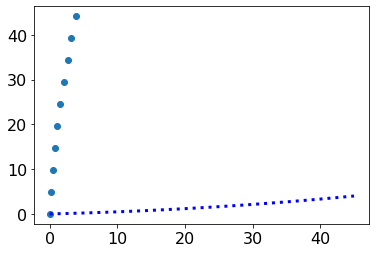

In [17]:
fig4, ax4 = plt.subplots()

# the data
ax4.scatter(stretchdata,forcedata)

# the model
ax4.plot(modelforce, modelstretch,
         color = 'blue', linestyle = ':',
         linewidth = 3., label = "model")

# the rectangle
maxbungee_force = max_force
maxbungee_stretch = desired_stretch

ax4.vlines(maxbungee_force, 0, 4,
         color = 'red', linestyle = '-',
         linewidth = 3., label = "max force")
ax4.hlines(maxbungee_stretch, 0, 45,
         color = 'red', linestyle = '-',
         linewidth = 3., label = "max stretch")


ax4.grid()
fig4.set_size_inches(10, 9)
#fig.savefig("myplot.png")
plt.show()

### Find the energy stored by the bungee

This is the area of the rectangle above - the area under the curve!

In [55]:
upper_limit = maxbungee_force

area_under = quad(polyint, 0., upper_limit, args = (coefs, degree))

energy_absorbed = maxbungee_force*maxbungee_stretch - area_under[0]

print("The area under the curve is %.3f with estimated error %.6f:" % (area_under))
print("The energy absorbed by the bungee cord is %.4f Joules" % energy_absorbed)

The area under the curve is 50.845 with estimated error 0.000000:
The energy absorbed by the bungee cord is 75.7008 Joules


### Mass that can be dropped!

Check to make sure the formula matches your energy bar chart analysis!

It was discussed that the mass of the bag and the clips should be deducted from the overall mass since they also fall from the railing. The mass of the bag and the 2 clips is 170 g.

In [57]:
# set mass of bag and clips
mass_BC = .170

mass_drop = energy_absorbed/(gravity*drop_height)
corrected_mass = mass_drop - mass_BC

print(" The maximum mass that will stop at the level of the floor is %.4f kg" % mass_drop)
print(" The mass that should go in the bag is %.4f kg" % corrected_mass)

 The maximum mass that will stop at the level of the floor is 1.2812 kg
 The mass that should go in the bag is 1.1112 kg


### Analysis

Did it work? Was it off a lot or a little? What might have contributed to the error?

## Reflection

Well.....that was certainly a piece of learning. The fact that I like how it worked out is not a particularly good sign for you the student. We'll see what happens this time around. On the other hand we could go back to counting all the little squares.......eeeeek!

### Extensions

Extensions are ideas that I didn't have time to explore or develop fully for this lab. These are offered as opportunities for students with more programming experience than is typical for students in the class.


### I have no ideas for this one!
